In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm, naive_bayes, metrics, linear_model, ensemble
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [2]:
def load_data(tron=False):
    """
        load data
        tron=True if want to shuffle data
    """
    print("Loading data...")
    train = pd.read_excel("./data/process/train.xlsx", sheet_name="data")
    valid = pd.read_excel("./data/process/valid.xlsx", sheet_name="data")
    test = pd.read_excel("./data/process/test.xlsx", sheet_name="data")
    trainX = train["content"].tolist()
    trainY = train["label"].tolist()
    validX = valid["content"].tolist()
    validY = valid["label"].tolist()
    testX = test["content"].tolist()
    testY = test["label"].tolist()
    if tron:
        trainX, trainY = shuffle(trainX, trainY)
        validX, validY = shuffle(validX, validY)
        testX, testY = shuffle(testX, testY)
    print("Load data done!")
    print(f"Train: {len(trainX)}, Valid: {len(validX)}, Test: {len(testX)}")
    return trainX, trainY, validX, validY, testX, testY

In [3]:
trainX, trainY, validX, validY, testX, testY = load_data(tron=True)

Loading data...
Load data done!
Train: 153012, Valid: 8000, Test: 16000


In [4]:
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=50000)
tfidf_vect.fit(trainX)

TfidfVectorizer(max_features=50000)

In [5]:
X_train =tfidf_vect.transform(trainX)
X_valid = tfidf_vect.transform(validX)
X_test = tfidf_vect.transform(testX)

In [6]:
svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_train)

TruncatedSVD(n_components=300, random_state=42)

In [7]:
X_train = svd.transform(X_train)
X_valid = svd.transform(X_valid)
X_test = svd.transform(X_test)

In [8]:
ran =ensemble.RandomForestClassifier(max_depth=30, verbose=1)
ran.fit(X_train, trainY)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.8min finished


RandomForestClassifier(max_depth=30, verbose=1)

In [9]:
valid = ran.predict(X_valid)
test = ran.predict(X_test)
print("Validation accuracy: ", metrics.accuracy_score(valid, validY))
print("Test accuracy: ", metrics.accuracy_score(test, testY))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Validation accuracy:  0.89
Test accuracy:  0.8858125


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [10]:
confu = metrics.confusion_matrix(test, testY, labels=[0, 1, 2, 3, 4, 5, 6, 7])
dis = metrics.ConfusionMatrixDisplay(confu, display_labels=[
    "chinh-tri",
    "doi-song",
    "giao-duc",
    "kinh-doanh",
    "phap-luat",
    "suc-khoe",
    "the-gioi",
    "the-thao",
])

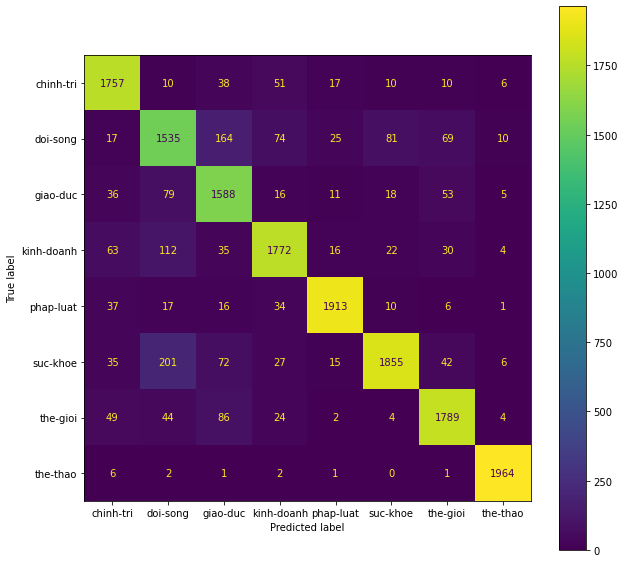

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
dis.plot(ax=ax)

In [12]:
from underthesea import word_tokenize

In [13]:
f = open("test.txt", "r", encoding="utf-8")
sent = f.readline().strip()

In [15]:
x = word_tokenize(sent, format="text").lower()
x

'ngày 1/2 , mạng xã_hội xuất_hiện đoạn video ghi lại cảnh hai người_lớn vào một điểm trường của tiểu_học tân_an_thạnh 2 ở huyện bình_tân đánh hai học_sinh khi các em đang chơi nhảy_dây với bạn ._trong video gần hai phút , một phụ_nữ chạy xe_máy vào sân trường , đằng sau đèo một học_sinh . cùng lúc này , một người đàn_ông đi tới túm áo một nam_sinh rồi tát tới_tấp vào đầu và mặt ._em này bị bắt đứng_yên để nam_sinh đi theo người phụ_nữ tát thêm ._ông này còn đến tát vào mặt một nam_sinh khác . trong lúc đó , người phụ_nữ kéo tay , khống_chế các nạn_nhân ._ông trần_duy_mên , hiệu_trưởng trường tiểu_học tân_an_thạnh , cho biết sự_việc xảy ra lúc hơn 16 h ngày 16/1 ( 25 tết ) ._điểm trường này có bốn lớp_học buổi chiều ._khi đó , học_sinh đã tan học , thầy_cô của trường cũng đã ra về , chỉ còn gần 10 em chơi_đùa trong lúc chờ cha_mẹ .'

In [16]:
k = [x]
m = tfidf_vect.transform(k)
n = svd.transform(m)

In [17]:
j = ran.predict(n)
j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([2])

In [18]:
import pickle

In [19]:
with open('random_vectorizer.pk', 'wb') as fin:
    pickle.dump(tfidf_vect, fin)

In [20]:
with open('random_svd.p', 'wb') as fin:
    pickle.dump(svd, fin)

In [21]:
with open('random_model.p', 'wb') as fin:
    pickle.dump(ran, fin)